In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

#%matplotlib ipympl

In [2]:
M = [1, 1, 1] # particle masses (this is actually sqrt(G)*M, but of course we are doing G = 1 here)
#----------

N = len(M) # number of particles in the system
def newtonian_dynamic_2D(t, η):
    # η = [X[0], Y[0], Vx[0], Vy[0], ..., X[N], Y[N], Vx[N], Vy[N]]
    dηdt = np.zeros(4*N, dtype=float)
    for i in range(0, N):
        dηdt[4*i+0] = η[4*i+2]
        dηdt[4*i+1] = η[4*i+3]
        for j in range(0, N):
            if i!=j:
                rij = np.sqrt(np.power(η[4*j]-η[4*i], 2) + np.power(η[4*j+1]-η[4*i+1], 2))
                dηdt[4*i+2] += M[j]*(η[4*j+0]-η[4*i+0])/np.power(rij, 3)
                dηdt[4*i+3] += M[j]*(η[4*j+1]-η[4*i+1])/np.power(rij, 3)
    return dηdt

In [19]:
η0 = [] # Condições iniciais
for i in range(0, 4*N):
    η0.append(np.random.uniform(-1,1))

η0 = [0.19581212969549666,
 0.9060405179518993,
 -0.668783305869568,
 -0.7511517543429094,
 0.29102274604937706,
 -0.5866390848025405,
 0.6721397338997188,
 -0.5441112804053352,
 -0.9990384556213929,
 0.361711844134762,
 0.19374805738963063,
 0.6701666541965488]

t_init = 0 # Tempo inicial da simulacao em unidades de sei la, bananas
t_final = 10 # Tempo final da simulacao em unidades de sei la, bananas
t_len = 1000 # Time step de um ponto ao outro
#----------

t_vec = np.linspace(t_init, t_final, t_len)
sol = solve_ivp(newtonian_dynamic_2D, [t_init, t_final], η0, method='RK45', t_eval=t_vec, rtol=1e-8)

In [20]:
X, Y = [], []
for i in range(0, N):
    x, y = interp1d(t_vec, sol.y[4*i+0]), interp1d(t_vec, sol.y[4*i+1])
    X.append(x(t_vec))
    Y.append(y(t_vec))
X_min, X_max = np.min(np.array(X).flatten()), np.max(np.array(X).flatten())
Y_min, Y_max = np.min(np.array(Y).flatten()), np.max(np.array(Y).flatten())

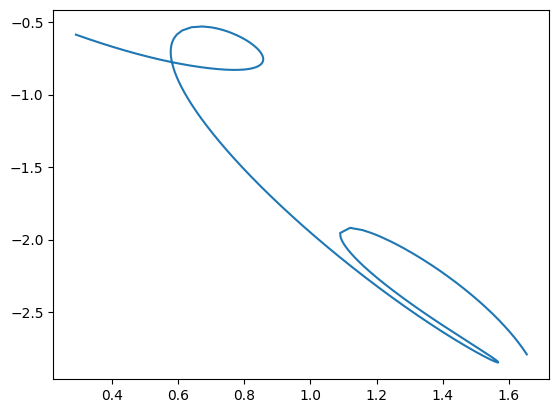

In [21]:
i = 1
plt.plot(X[i], Y[i])

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax_lim_tolerance = 0.1
X_ax = ax.set_xlim(X_min - ax_lim_tolerance, X_max + ax_lim_tolerance)
Y_ax = ax.set_ylim(Y_min - ax_lim_tolerance, Y_max + ax_lim_tolerance)

artists = []   
for i in range(0, N):
    artists.append(ax.plot([], [])[0])

def frame_update(i):
    if renew_art:
        for j in range(0, N):
            artists[j].set_data(X[j][i:i+arts], Y[j][i:i+arts])
    else:
        for j in range(0, N):
            artists[j].set_data(X[j][0:i], Y[j][0:i])
    return

ani = animation.FuncAnimation(fig, frame_update, frames=t_len-arts, interval=10)
#writergif = animation.PillowWriter(fps=35) 
#ani.save("caique_N-planets.gif", writer=writergif)